# Preprocessing

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE as tsne
import seaborn as sns
from sklearn.cluster import DBSCAN

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

''

In [ ]:
data = pd.read_csv('covtype_train.csv')
data1 = data.copy()
data1.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406708 entries, 0 to 406707
Data columns (total 11 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   Elevation                           406708 non-null  object
 1   Aspect                              406708 non-null  object
 2   Slope                               406708 non-null  object
 3   Hillshade_9am                       406708 non-null  object
 4   Hillshade_Noon                      406708 non-null  object
 5   Horizontal_Distance_To_Hydrology    406708 non-null  int64 
 6   Vertical_Distance_To_Hydrology      406708 non-null  int64 
 7   Horizontal_Distance_To_Fire_Points  406708 non-null  object
 8   Soil_Type                           406708 non-null  int64 
 9   Wilderness                          406708 non-null  int64 
 10  target                              406708 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 34

,Elevation,Aspect,Slope,Hillshade_9am,Hillshade_Noon,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Fire_Points,Soil_Type,Wilderness,target
0,elevation_medium,aspect_medium,slope_low,hillshade_9am_max,hillnoon_max,0,1,low,22,0,2
1,elevation_high,aspect_medium,slope_low,hillshade_9am_max,hillnoon_max,1,1,mid,32,2,1
2,elevation_medium,aspect_low,slope_low,hillshade_9am_max,hillnoon_max,1,1,low,10,2,2
3,elevation_high,aspect_ultra,slope_medium,hillshade_9am_max,hillnoon_max,2,1,low,23,2,1
4,elevation_high,aspect_high,slope_low,hillshade_9am_max,hillnoon_max,2,1,mid,28,0,2


In [ ]:
data['target'].value_counts()

2    198310
1    148288
3     25028
7     14357
6     12157
5      6645
4      1923
Name: target, dtype: int64

- True labels count

In [ ]:
data = data[:5000]
data['target'].value_counts()

2    2504
1    1748
3     340
7     179
6     139
5      66
4      24
Name: target, dtype: int64

In [ ]:
data.drop(columns=['target'], inplace=True)
data.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Elevation,Aspect,Slope,Hillshade_9am,Hillshade_Noon,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Fire_Points,Soil_Type,Wilderness
0,elevation_medium,aspect_medium,slope_low,hillshade_9am_max,hillnoon_max,0,1,low,22,0
1,elevation_high,aspect_medium,slope_low,hillshade_9am_max,hillnoon_max,1,1,mid,32,2
2,elevation_medium,aspect_low,slope_low,hillshade_9am_max,hillnoon_max,1,1,low,10,2
3,elevation_high,aspect_ultra,slope_medium,hillshade_9am_max,hillnoon_max,2,1,low,23,2
4,elevation_high,aspect_high,slope_low,hillshade_9am_max,hillnoon_max,2,1,mid,28,0


In [ ]:
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()   
# Encode labels in column 'species'. 
data['Elevation']= label_encoder.fit_transform(data['Elevation']) 
data['Elevation'].unique() 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array([2, 0, 3, 1])

In [ ]:
data['Aspect']= label_encoder.fit_transform(data['Aspect']) 
data['Aspect'].unique() 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array([2, 1, 3, 0])

In [ ]:
data['Slope']= label_encoder.fit_transform(data['Slope']) 
data['Slope'].unique() 
  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array([1, 2, 0])

In [ ]:
data['Wilderness']= label_encoder.fit_transform(data['Wilderness']) 
data['Wilderness'].unique() 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array([0, 2, 3, 1])

In [ ]:
data['Soil_Type']= label_encoder.fit_transform(data['Soil_Type']) 
data['Soil_Type'].unique() 

array([20, 30,  9, 21, 26,  8, 35, 29, 27, 13, 19, 10, 11,  3, 36, 24, 14,
        1, 17, 28,  5, 33,  7, 16,  2, 18, 12, 32,  0, 31,  4, 37, 22, 23,
       25, 15,  6, 34])

In [ ]:
data['Hillshade_9am']= label_encoder.fit_transform(data['Hillshade_9am']) 
data['Hillshade_9am'].unique() 

array([0, 1])

In [ ]:
data['Hillshade_Noon']= label_encoder.fit_transform(data['Hillshade_Noon']) 
data['Hillshade_Noon'].unique() 

array([0, 1])

In [ ]:

data['Horizontal_Distance_To_Hydrology']= label_encoder.fit_transform(data['Horizontal_Distance_To_Hydrology']) 
data['Horizontal_Distance_To_Hydrology'].unique() 

array([0, 1, 2, 3, 4, 5, 6])

In [ ]:

data['Vertical_Distance_To_Hydrology']= label_encoder.fit_transform(data['Vertical_Distance_To_Hydrology']) 
data['Vertical_Distance_To_Hydrology'].unique()

array([1, 2, 0, 3, 5, 4])

In [ ]:

data['Horizontal_Distance_To_Fire_Points']= label_encoder.fit_transform(data['Horizontal_Distance_To_Fire_Points']) 
data['Horizontal_Distance_To_Fire_Points'].unique()

array([1, 2, 0])

In [ ]:
data

,Elevation,Aspect,Slope,Hillshade_9am,Hillshade_Noon,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Fire_Points,Soil_Type,Wilderness
0,2,2,1,0,0,0,1,1,20,0
1,0,2,1,0,0,1,1,2,30,2
2,2,1,1,0,0,1,1,1,9,2
3,0,3,2,0,0,2,1,1,21,2
4,0,0,1,0,0,2,1,2,26,0
...,...,...,...,...,...,...,...,...,...,...
4995,0,3,2,0,0,0,1,1,30,2
4996,0,1,1,0,0,3,0,1,20,0
4997,2,0,0,0,0,0,1,1,11,2
4998,2,3,1,0,0,0,1,1,1,2


In [ ]:
data_numerical = np.array(data)
print(data_numerical.shape)

(5000, 10)


- Reducing the dimensionality..

> New dimensions = 2



In [ ]:
reduced_data = tsne(n_components=2).fit_transform(data_numerical)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [ ]:
print(reduced_data.shape)

(5000, 2)


# Question 1

# 1. K-Means Clustering

In [ ]:
kmeans = KMeans(n_clusters=7,max_iter=60,random_state=100).fit(reduced_data)
labels_kmean = kmeans.labels_
centroids = kmeans.cluster_centers_

# printing centroids
print(labels_kmean,centroids)

[4 5 1 ... 6 2 5] [[ 20.416544 -54.68652 ]
 [-16.238287  56.9936  ]
 [ 31.475964  53.943443]
 [ 57.26956    4.13461 ]
 [ 10.525434  -4.832621]
 [-52.41819   11.423628]
 [-46.98665  -42.913036]]


In [ ]:
kmeans_normal = KMeans(n_clusters=7, init='random',max_iter=50,random_state=300).fit(reduced_data)
labels_normal = kmeans_normal.labels_
centroids_normal = kmeans_normal.cluster_centers_

- Visualisation

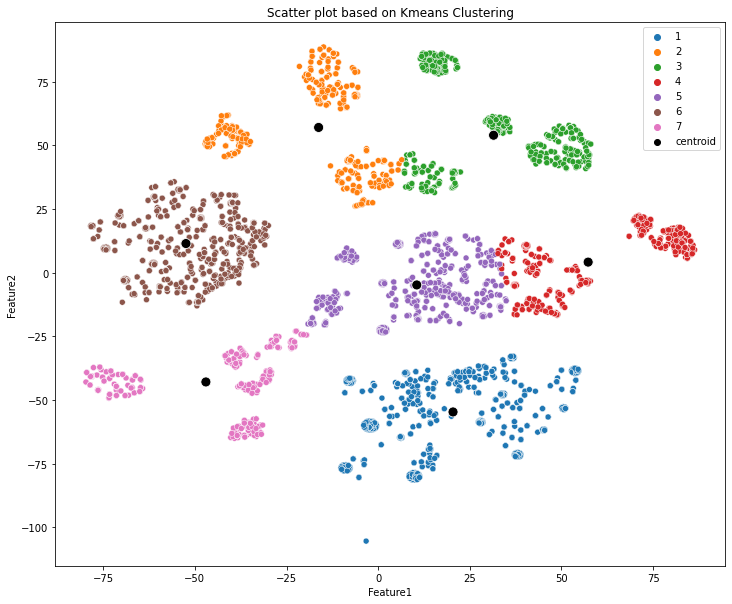

In [ ]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
centr = ['Centroid']*7
palette = {"Centroid":"k"}
n_classes = len(np.unique(labels_kmean))
plot = sns.scatterplot(x=reduced_data[:,0],y=reduced_data[:,1],ax=ax,  hue=labels_kmean,palette=sns.color_palette('tab10',n_colors=n_classes))
sns.scatterplot(x=centroids[:,0],y=centroids[:,1],hue=centr,palette=palette,ax=ax,s=100)
handles, plot_labels = plot.get_legend_handles_labels()
plt.legend(handles,[1,2,3,4,5,6,7,'centroid'])
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('Scatter plot based on Kmeans Clustering')
plt.show()

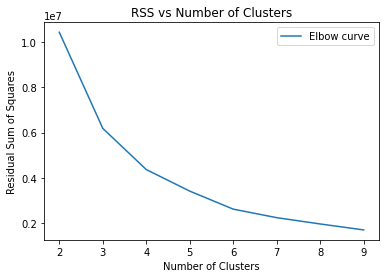

In [ ]:
rss = []
clusters = range(2,10)
for k in range(2,10):
  clf = KMeans(n_clusters=k, init='random').fit(reduced_data)
  rss.append(clf.inertia_)
ec, = plt.plot(clusters,rss,label='Elbow curve')
# ep = plt.axvline(x=3,linestyle='--',color='r',label='Elbow Point')
plt.title('RSS vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Residual Sum of Squares')
plt.legend(handles=[ec])
plt.show()

- Cluster Distribution

In [ ]:
#Kmeans - number of points per cluster
lab = list(np.unique(labels_kmean))
pts_percluster = []
for val in lab:
  pts_percluster.append(list(labels_kmean).count(val))
print(pts_percluster)

[992, 643, 607, 514, 816, 930, 498]


# 2. DBSCAN

In [ ]:
dbscan = DBSCAN(eps=17, min_samples=5).fit(reduced_data)
labels_dbscan = dbscan.labels_
core_points = dbscan.core_sample_indices_
print(len(core_points))

4999


In [ ]:
from sklearn.neighbors import NearestCentroid
clf=NearestCentroid()
X=dbscan.fit_predict(reduced_data)
clf.fit(reduced_data,X)

# printing centroids
print((clf.centroids_))

centroids_count = len(clf.centroids_)

[[  -3.28529191 -105.37787628]
 [   9.64177513  -12.19651318]
 [ -50.82637787   17.19971085]
 [  16.00797653   82.40599823]
 [  46.20327377   50.71595001]
 [  78.43039703   13.9522171 ]
 [ -72.13568878  -42.99982071]]


In [ ]:
 len(dbscan.labels_)

5000

- Visualisation

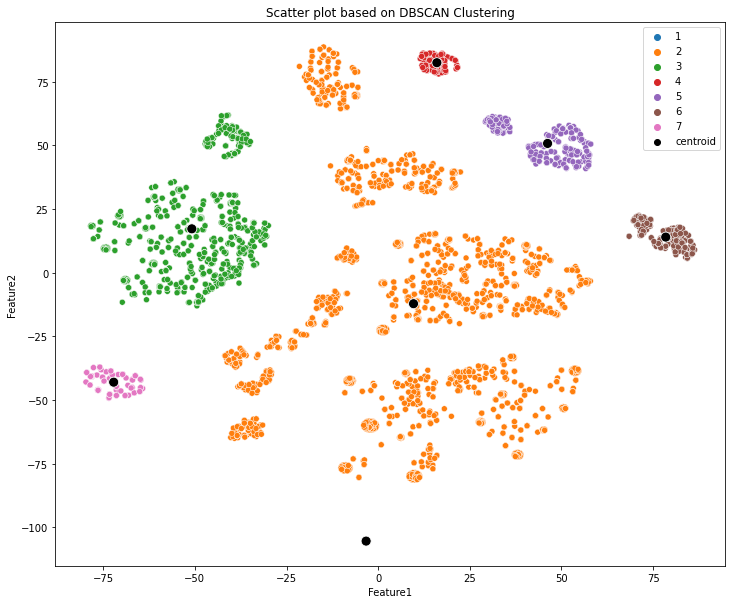

In [ ]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
centr = ['Centroid']*centroids_count
n_classes = len(np.unique(labels_dbscan))
plot = sns.scatterplot(x=reduced_data[:,0],y=reduced_data[:,1],ax=ax,hue=labels_dbscan,palette=sns.color_palette('tab10',n_colors=n_classes))
sns.scatterplot(x=clf.centroids_[:,0],y=clf.centroids_[:,1],hue=centr,palette=palette,ax=ax,s=100)
handles, plot_labels = plot.get_legend_handles_labels()
plt.legend(handles,[1,2,3,4,5,6,7,'centroid'])
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('Scatter plot based on DBSCAN Clustering')
plt.show()

- Cluster Distribution

In [ ]:
lab = list(np.unique(labels_dbscan))
pts_percluster = []
for val in lab:
  pts_percluster.append(list(labels_dbscan).count(val))
print(pts_percluster)

[1, 3093, 1081, 126, 319, 204, 176]


# 3. Agglomeratives

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
#agglo = AgglomerativeClustering(n_clusters=7,affinity='cosine',linkage='average').fit(reduced_data)
agglo = AgglomerativeClustering(n_clusters=7).fit(reduced_data)
labels_agglo = agglo.labels_


In [ ]:
from sklearn.neighbors import NearestCentroid
clf=NearestCentroid()
X=agglo.fit_predict(reduced_data)
clf.fit(reduced_data,X)


# printing centroids
print(clf.centroids_)

[[ 58.77371216  36.37598419]
 [-40.88491058 -37.52011871]
 [ 20.41654968 -54.68649292]
 [-14.04833984  70.84880066]
 [ 23.56956482  -2.97570086]
 [-52.41819382  11.42363262]
 [  4.00540781  37.9930191 ]]


- Visualisation

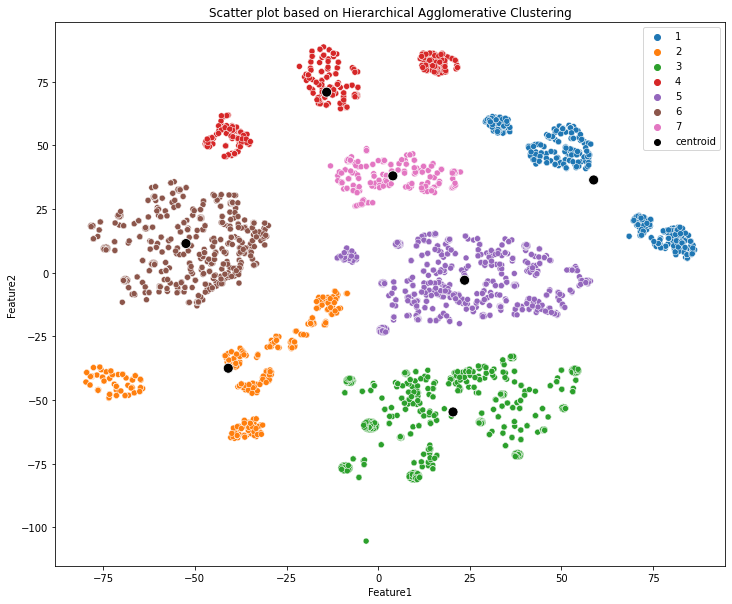

In [ ]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
n_classes = len(np.unique(labels_agglo))
centr = ['Centroid']*7
plot = sns.scatterplot(x=reduced_data[:,0],y=reduced_data[:,1],ax=ax,hue=labels_agglo,palette=sns.color_palette('tab10',n_colors=n_classes))
sns.scatterplot(x=clf.centroids_[:,0],y=clf.centroids_[:,1],hue=centr,palette=palette,ax=ax,s=100)
handles, plot_labels = plot.get_legend_handles_labels()
plt.legend(handles,[1,2,3,4,5,6,7,'centroid'])
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('Scatter plot based on Hierarchical Agglomerative Clustering')
plt.show()

- Cluster Distribution

In [ ]:
lab = list(np.unique(labels_agglo))
pts_percluster = []
for val in lab:
  pts_percluster.append(list(labels_agglo).count(val))
print(pts_percluster)

[523, 613, 992, 543, 1011, 930, 388]


# 4. Gaussian

In [ ]:
# training gaussian mixture model 
# training gaussian mixture model 
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=7)
gmm.fit(reduced_data)

#predictions from gmm
labels_gaussian = gmm.predict(reduced_data)
frame = pd.DataFrame(reduced_data)
frame['cluster'] = labels_gaussian
frame.columns = ['Weight', 'Height','cluster']


- Visualisation

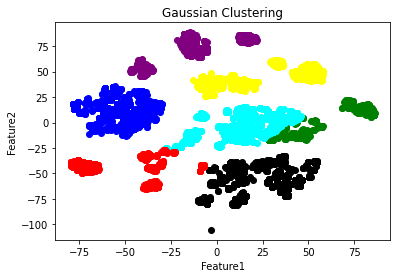

In [ ]:
color=['blue','green','cyan', 'black','red','yellow','purple']
for k in range(0,7):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["Weight"],data["Height"],c=color[k])

plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('Gaussian Clustering')
plt.show()


- Cluster Distribution

In [ ]:
lab = list(np.unique(labels_gaussian))
pts_percluster = []
for val in lab:
  pts_percluster.append(list(labels_gaussian).count(val))
print(pts_percluster)

[930, 435, 938, 948, 499, 707, 543]


- Comparing all clustering techniques with Gaussian Mixture

In [ ]:
from sklearn.metrics.cluster import adjusted_mutual_info_score
adjusted_mutual_info_score(labels_kmean, labels_gaussian)

0.838397917001275

In [ ]:
adjusted_mutual_info_score(labels_dbscan, labels_gaussian)

0.5298783316173058

In [ ]:
adjusted_mutual_info_score(labels_agglo, labels_gaussian)

0.8528590658622243

# Question 2

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE as tsne
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('covtype_train.csv')
data.isnull().any().sum()

0

In [ ]:
data.head()

,Elevation,Aspect,Slope,Hillshade_9am,Hillshade_Noon,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Fire_Points,Soil_Type,Wilderness,target
0,elevation_medium,aspect_medium,slope_low,hillshade_9am_max,hillnoon_max,0,1,low,22,0,2
1,elevation_high,aspect_medium,slope_low,hillshade_9am_max,hillnoon_max,1,1,mid,32,2,1
2,elevation_medium,aspect_low,slope_low,hillshade_9am_max,hillnoon_max,1,1,low,10,2,2
3,elevation_high,aspect_ultra,slope_medium,hillshade_9am_max,hillnoon_max,2,1,low,23,2,1
4,elevation_high,aspect_high,slope_low,hillshade_9am_max,hillnoon_max,2,1,mid,28,0,2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406708 entries, 0 to 406707
Data columns (total 11 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   Elevation                           406708 non-null  object
 1   Aspect                              406708 non-null  object
 2   Slope                               406708 non-null  object
 3   Hillshade_9am                       406708 non-null  object
 4   Hillshade_Noon                      406708 non-null  object
 5   Horizontal_Distance_To_Hydrology    406708 non-null  int64 
 6   Vertical_Distance_To_Hydrology      406708 non-null  int64 
 7   Horizontal_Distance_To_Fire_Points  406708 non-null  object
 8   Soil_Type                           406708 non-null  int64 
 9   Wilderness                          406708 non-null  int64 
 10  target                              406708 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 34

In [ ]:
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()  

In [ ]:
data['Elevation']= label_encoder.fit_transform(data['Elevation']) 
data['Elevation'].unique() 

array([2, 0, 3, 1])

In [ ]:
data['Aspect']= label_encoder.fit_transform(data['Aspect']) 
data['Aspect'].unique() 

array([2, 1, 3, 0])

In [ ]:
data['Slope']= label_encoder.fit_transform(data['Slope'])
data['Slope'].unique() 

array([1, 2, 0, 3])

In [ ]:
data['Wilderness']= label_encoder.fit_transform(data['Wilderness'])
data['Wilderness'].unique() 

array([0, 2, 3, 1])

In [ ]:
data['Soil_Type']= label_encoder.fit_transform(data['Soil_Type']) 
data['Soil_Type'].unique() 

array([22, 32, 10, 23, 28,  9, 37, 31, 29, 15, 21, 11, 12,  3, 38, 26, 16,
        1, 19, 30,  5, 35,  8, 18,  2, 20, 13, 34,  0, 33,  4, 39, 24, 25,
       27, 17,  7, 36,  6, 14])

In [ ]:
data['Hillshade_9am']= label_encoder.fit_transform(data['Hillshade_9am'])   
data['Hillshade_9am'].unique() 

array([0, 1])

In [ ]:
data['Hillshade_Noon']= label_encoder.fit_transform(data['Hillshade_Noon']) 
data['Hillshade_Noon'].unique() 

array([0, 1])

In [ ]:
data['Vertical_Distance_To_Hydrology']= label_encoder.fit_transform(data['Vertical_Distance_To_Hydrology']) 
data['Vertical_Distance_To_Hydrology'].unique()

array([1, 2, 0, 3, 5, 4])

In [ ]:
data['Horizontal_Distance_To_Fire_Points']= label_encoder.fit_transform(data['Horizontal_Distance_To_Fire_Points'])   
data['Horizontal_Distance_To_Fire_Points'].unique()

array([1, 2, 0])

In [ ]:
for index,row in data.iterrows():
  row['target'] = row['target']-1

In [ ]:
def elbow_plot(data):
    scores = [KMeans(n_clusters=i+2).fit(data).inertia_ 
          for i in range(10)]
    sns.lineplot(np.arange(2, 12), scores)
    plt.xlabel('Number of clusters')
    plt.ylabel("Inertia")
    plt.title("Inertia of k-Means versus number of clusters")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


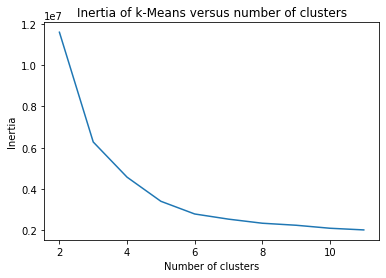

In [ ]:
elbow_plot(data)

In [ ]:
features = data.loc[ : , data.columns != 'target']
labels = pd.DataFrame(data['target'])
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.20, random_state = 20, stratify = labels)

In [ ]:
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit_predict(X_train)
kmeans = KMeans(n_clusters=7)
kmeans.fit(X_train)
y_pred = kmeans.predict(X_test)

In [ ]:
y_pred_list = list(y_pred)
y_test_list = list(y_test['target'])
dic = {0:{0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0}, 
       1:{0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0}, 
          2:{0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0}, 
             3:{0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0}, 
                4:{0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0}, 
                   5:{0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0}, 
                      6:{0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0}}

In [ ]:
for i in range(len(y_pred_list)):
  index = y_pred_list[i]
  dic[index][y_test_list[i]] += 1

In [ ]:
mapping = {}
for label in dic:
  new_dic = dic[label]
  max_key = max(new_dic, key=new_dic.get)
  mapping[label] = max_key

In [ ]:
for i in range(len(y_pred)):
  val = y_pred[i]
  y_pred[i] = mapping[val]

In [ ]:
f1 = metrics.f1_score(y_test,y_pred, average='macro')
print(f1)

0.26073330530585903


In [ ]:
'''DO NOT DELETE ANY PART OF CODE
We will run only the evaluation function.

Do not put anything outside of the functions, it will take time in evaluation.
You will have to create another code file to run the necessary code.
'''

import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE as tsne
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

# other functions

def predict(test_set) :
    # find and load your best model
    # Do all preprocessings inside this function only.
    # predict on the test set provided
    # label_encoder object knows how to understand word labels.
  test_df = pd.read_csv(test_set) 
  data = pd.read_csv('covtype_train.csv')
  label_encoder = preprocessing.LabelEncoder()  

  data['Elevation']= label_encoder.fit_transform(data['Elevation']) 
  data['Aspect']= label_encoder.fit_transform(data['Aspect']) 
  data['Slope']= label_encoder.fit_transform(data['Slope'])
  data['Wilderness']= label_encoder.fit_transform(data['Wilderness'])
  data['Soil_Type']= label_encoder.fit_transform(data['Soil_Type']) 
  data['Hillshade_9am']= label_encoder.fit_transform(data['Hillshade_9am'])
  data['Hillshade_Noon']= label_encoder.fit_transform(data['Hillshade_Noon']) 
  data['Horizontal_Distance_To_Hydrology']= label_encoder.fit_transform(data['Horizontal_Distance_To_Hydrology']) 
  data['Vertical_Distance_To_Hydrology']= label_encoder.fit_transform(data['Vertical_Distance_To_Hydrology']) 
  data['Horizontal_Distance_To_Fire_Points']= label_encoder.fit_transform(data['Horizontal_Distance_To_Fire_Points']) 
  
  test_df['Elevation']= label_encoder.fit_transform(test_df['Elevation']) 
  test_df['Aspect']= label_encoder.fit_transform(test_df['Aspect']) 
  test_df['Slope']= label_encoder.fit_transform(test_df['Slope'])
  test_df['Wilderness']= label_encoder.fit_transform(test_df['Wilderness'])
  test_df['Soil_Type']= label_encoder.fit_transform(test_df['Soil_Type']) 
  test_df['Hillshade_9am']= label_encoder.fit_transform(test_df['Hillshade_9am'])
  test_df['Hillshade_Noon']= label_encoder.fit_transform(test_df['Hillshade_Noon']) 
  test_df['Horizontal_Distance_To_Hydrology']= label_encoder.fit_transform(test_df['Horizontal_Distance_To_Hydrology']) 
  test_df['Vertical_Distance_To_Hydrology']= label_encoder.fit_transform(test_df['Vertical_Distance_To_Hydrology']) 
  test_df['Horizontal_Distance_To_Fire_Points']= label_encoder.fit_transform(test_df['Horizontal_Distance_To_Fire_Points']) 
  
  for index,row in data.iterrows():
    row['target'] = row['target']-1

  features = data.loc[ : , data.columns != 'target']
  labels = pd.DataFrame(data['target'])
  test_df = test_df.loc[:, test_df.columns != 'target']

  kmeans = KMeans(n_clusters=5)

  kmeans.fit(features)
  y_pred = kmeans.predict(features)
  y_pred_list = list(y_pred)
  y_test_list = list(labels['target'])
  dic = {0:{0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0}, 
        1:{0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0}, 
            2:{0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0}, 
              3:{0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0}, 
                  4:{0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0}, 
                    5:{0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0}, 
                        6:{0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0}}
  for i in range(len(y_pred_list)):
    index = y_pred_list[i]
    dic[index][y_test_list[i]] += 1
  mapping = {}
  for label in dic:
    new_dic = dic[label]
    max_key = max(new_dic, key=new_dic.get)
    mapping[label] = max_key
  # print(mapping)
  
  y_pred = kmeans.predict(test_df)

  for i in range(len(y_pred)):
    val = y_pred[i]
    y_pred[i] = mapping[val]
    y_pred[i] = y_pred[i]+1
  # f1 = metrics.f1_score(labels,y_pred, average='weighted')
  # print(f1)
    
  return list(y_pred)